In [1]:
import gym
import gym_anytrading

from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



C:\Users\chris\anaconda3\envs\practicalRL\lib\site-packages\stable_baselines\__init__.py:33: UserWarning: stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation.
  "stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation."


In [2]:
df = pd.read_csv('S&P.csv')

In [3]:
#Preprocessing data for the Vectorizer
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', ascending=True, inplace=True)
df.set_index('Date', inplace=True)

In [4]:
df

,Open,High,Low,Close
Date,,,,
2000-06-01,1448.81,1448.81,1420.60,1448.81
2000-06-02,1477.26,1483.43,1448.81,1477.26
2000-06-05,1467.63,1477.26,1464.67,1467.63
2000-06-06,1457.84,1471.32,1454.78,1457.84
2000-06-07,1471.36,1474.57,1455.22,1471.36
...,...,...,...,...
2021-05-25,4205.94,4213.42,4182.52,4188.13
2021-05-26,4191.59,4202.61,4184.11,4195.99
2021-05-27,4201.94,4213.38,4197.78,4200.88


In [5]:
env = gym.make('stocks-v0', df=df, frame_bound=(5, 4035), window_size=5)

{'total_reward': 1003.7099999999984, 'total_profit': 4.6546101612909287e-07, 'position': 0}


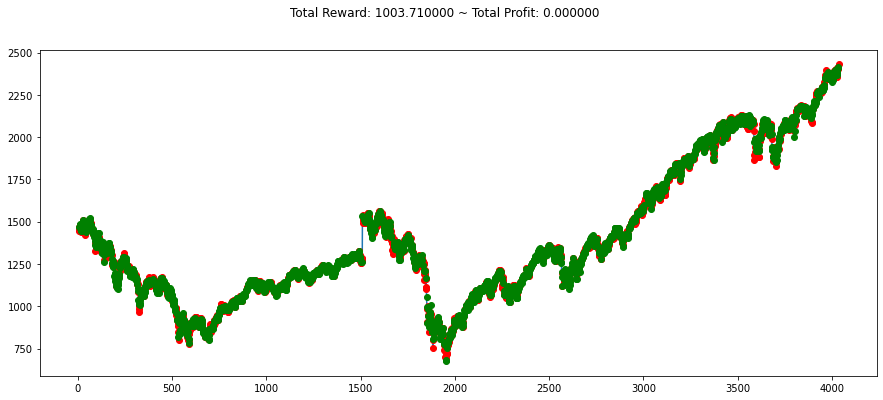

In [6]:
# RANDOM ACTIONS
state = env.reset()

while True:
    action = env.action_space.sample()
    next_state, reward, done, info = env.step(action)
    
    if done:
        print(info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [7]:
#Make as many of these as you want
env_training = lambda: gym.make('stocks-v0', df=df, frame_bound=(5, 4035), window_size=5)

#Pass in all of the training environments as a lisst to the vectorizer
env = DummyVecEnv([env_training])

In [8]:
model = A2C('MlpLstmPolicy', env, verbose=1)
model.learn(total_timesteps=10000)

#RESULTS EXPLAINED 3 BELOW SHOULD BE AS LOW AS POSSIBLE
#Explained Variance 
#Policy Entropy
#Value Loss





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


---------------------------------
| explained_variance | 0.00187  |
| fps                | 27       |
| nupdates           | 1        |
| policy_entropy     | 0.693    |
| total_timesteps    | 5        |
| value_loss         | 143      |
---------------------------------
----------------------------------
| explained_variance | -0.000494 |
| fps                | 688       |
| nupdates           | 100       |
| policy_entropy     | 0.693     |
| total_timesteps    | 500       |
| value_loss         | 45.5      |
----------------------------------
----------------------------------
| explained_variance | -0.000309 |
| fps                

---------------------------------
| explained_variance | 0.00605  |
| fps                | 938      |
| nupdates           | 1600     |
| policy_entropy     | 0.565    |
| total_timesteps    | 8000     |
| value_loss         | 25.9     |
---------------------------------
---------------------------------
| explained_variance | 0.0332   |
| fps                | 941      |
| nupdates           | 1700     |
| policy_entropy     | 0.691    |
| total_timesteps    | 8500     |
| value_loss         | 3.85     |
---------------------------------
---------------------------------
| explained_variance | 0.00991  |
| fps                | 940      |
| nupdates           | 1800     |
| policy_entropy     | 0.691    |
| total_timesteps    | 9000     |
| value_loss         | 1.02e+03 |
---------------------------------
---------------------------------
| explained_variance | -0.00681 |
| fps                | 941      |
| nupdates           | 1900     |
| policy_entropy     | 0.692    |
| total_timest

In [9]:
env = gym.make('stocks-v0', df=df, frame_bound=(4036, 5044), window_size=5)
obs = env.reset()

while True:
    obs = obs[np.newaxis, ...]
    action, states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    
    if done:
        print(info)
        break

{'total_reward': 1256.6100000000024, 'total_profit': 0.04389762249134951, 'position': 0}


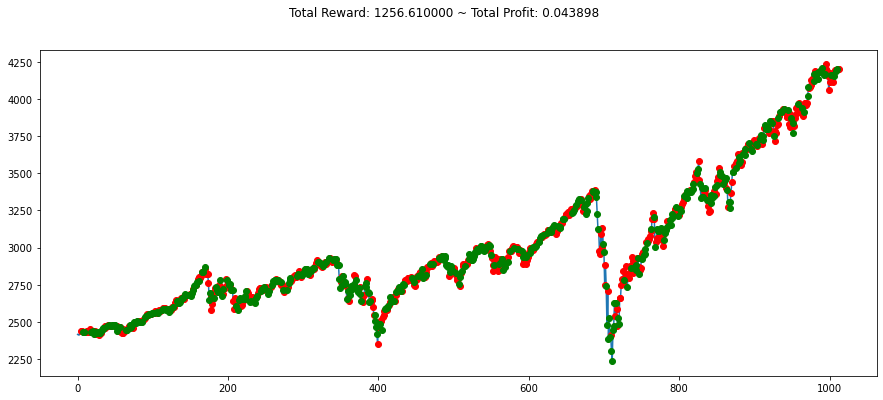

In [10]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [11]:
import yfinance as yf
from pandas_datareader import data as pdr

data = pdr.get_data_yahoo('SPY', start='2000-01-01', end='2021-06-01')

In [12]:
from ta import add_all_ta_features

df2 = add_all_ta_features(data, open="Open", high="High", low="Low", close="Close", volume="Volume", fillna=True)
df2

C:\Users\chris\anaconda3\envs\practicalRL\lib\site-packages\ta\trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
C:\Users\chris\anaconda3\envs\practicalRL\lib\site-packages\ta\trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


,High,Low,Open,Close,Volume,Adj Close,volume_adi,volume_obv,volume_cmf,volume_fi,volume_mfi,volume_em,volume_sma_em,volume_vpt,volume_nvi,volume_vwap,volatility_atr,volatility_bbm,volatility_bbh,volatility_bbl,volatility_bbw,volatility_bbp,volatility_bbhi,volatility_bbli,volatility_kcc,volatility_kch,volatility_kcl,volatility_kcw,volatility_kcp,volatility_kchi,volatility_kcli,volatility_dcl,volatility_dch,volatility_dcm,volatility_dcw,volatility_dcp,volatility_ui,trend_macd,trend_macd_signal,trend_macd_diff,trend_sma_fast,trend_sma_slow,trend_ema_fast,trend_ema_slow,trend_adx,trend_adx_pos,trend_adx_neg,trend_vortex_ind_pos,trend_vortex_ind_neg,trend_vortex_ind_diff,trend_trix,trend_mass_index,trend_cci,trend_dpo,trend_kst,trend_kst_sig,trend_kst_diff,trend_ichimoku_conv,trend_ichimoku_base,trend_ichimoku_a,trend_ichimoku_b,trend_visual_ichimoku_a,trend_visual_ichimoku_b,trend_aroon_up,trend_aroon_down,trend_aroon_ind,trend_psar_up,trend_psar_down,trend_psar_up_indicator,trend_psar_down_indicator,trend_stc,momentum_rsi,momentum_stoch_rsi,momentum_stoch_rsi_k,momentum_stoch_rsi_d,momentum_tsi,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-01-03,148.250000,143.875000,148.250000,145.437500,8164300.0,97.825676,-2.332657e+06,8.164300e+06,-0.285714,0.000000e+00,50.000000,0.000000,0.000000,-1.258560e+06,1000.000000,145.854167,0.000000,145.437500,145.437500,145.437500,0.000000,0.000000,0.0,0.0,145.854167,150.229167,141.479167,5.999143,0.452381,0.0,0.0,143.875000,148.250000,146.062500,3.008165,0.357143,0.000000,0.000000,0.000000,0.000000,145.437500,145.437500,145.437500,145.437500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-13.858286,1.000000,0.000000,24.449103,-143.914252,-143.914252,0.000000,146.062500,146.062500,146.062500,146.062500,168.854823,167.218805,4.0,4.0,0.0,-1.000000,-1.000000,0.0,0.0,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.714286,35.714286,-64.285714,0.000000,145.437500,0.000000,0.000000,0.000000,0.000000,-14.391425,0.000000,0.000000
2000-01-04,144.062500,139.640625,143.531250,139.750000,8089800.0,94.000107,-1.002226e+07,7.450000e+04,-0.616599,-4.601074e+07,0.000000,-230.169340,-230.169340,-1.491320e+06,960.893855,143.513382,0.000000,142.593750,148.281250,136.906250,7.977208,0.250000,0.0,0.0,143.502604,147.901042,139.104167,6.130115,0.073416,0.0,0.0,139.640625,148.250000,143.945312,6.037694,0.012704,0.000000,-0.453704,-0.090741,-0.362963,142.593750,142.593750,144.562500,145.016204,0.000000,0.000000,0.000000,0.005895,0.270663,-0.264768,-0.007638,2.001714,-66.666667,27.292853,-160.653358,-152.283805,-8.369553,143.945312,143.945312,143.945312,143.945312,168.854823,167.218805,4.0,8.0,-4.0,-1.000000,-1.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,-100.000000,1.075269,1.270417,18.492352,-98.729583,0.000000,143.051397,0.000000,-0.072842,-0.014568,-0.058274,-3.910615,-3.989133,-3.910615
2000-01-05,141.531250,137.250000,139.937500,140.000000,12177900.0,94.168259,-6.555554e+06,1.225240e+07,-0.230570,-3.900285e+07,0.000000,-86.516466,-158.342903,-2.945757e+05,960.893855,141.834538,0.000000,141.729167,146.977513,136.480820,7.406163,0.335266,0.0,0.0,142.199653,146.559028,137.840278,6.131344,0.247710,0.0,0.0,137.250000,148.250000,142.750000,7.761282,0.250000,0.000000,-0.784056,-0.229404,-0.554652,141.729167,141.729167,143.860577,144.644633,0.000000,0.000000,0.000000,0.057582,0.427320,-0.369738,-0.019715,2.999313,-71.306413,28.157437,-165.742537,-156.770049,-8.972488,142.750000,142.750000,142.750000,142.750000,168.854823,167.218805,4.0,8.0,-4.0,-1.000000,148.250000,0.0,1.0,0.000000,4.519774,0.000000,0.000000,0.000000,-99.902368,19.783784,25.000000,20.661568,-75.000000,0.000000,141.737643,0.000000,3.731863,0.734718,2.997145,0.178891,0.178731,-3.738719
200

In [14]:
from gym_anytrading.envs import StocksEnv

def my_processed_data(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:, 'Low'].to_numpy()[start:end]
    signal_features = env.df.loc[:,['Close','Volume','momentum_rsi','volume_obv','trend_macd_diff']].to_numpy()[start:end]
    return prices, signal_features

class MyCustomEnv(StocksEnv):
    _process_data = my_processed_data

In [15]:
env2 = MyCustomEnv(df=df2, window_size=5, frame_bound=(5, 4035))

In [17]:
training_env = lambda: env2
env = DummyVecEnv([training_env])

model = A2C('MlpLstmPolicy', env, verbose=1)
model.learn(total_timesteps=10000)

---------------------------------
| explained_variance | -0.0391  |
| fps                | 31       |
| nupdates           | 1        |
| policy_entropy     | 0.692    |
| total_timesteps    | 5        |
| value_loss         | 5.66     |
---------------------------------
---------------------------------
| explained_variance | -0.0501  |
| fps                | 749      |
| nupdates           | 100      |
| policy_entropy     | 0.692    |
| total_timesteps    | 500      |
| value_loss         | 0.26     |
---------------------------------
----------------------------------
| explained_variance | -0.000229 |
| fps                | 853       |
| nupdates           | 200       |
| policy_entropy     | 0.693     |
| total_timesteps    | 1000      |
| value_loss         | 1.83      |
----------------------------------
---------------------------------
| explained_variance | -2.76    |
| fps                | 883      |
| nupdates           | 300      |
| policy_entropy     | 0.693    |
| tota

In [18]:
env = MyCustomEnv(df=df2, window_size=5, frame_bound=(4036, 5387))
obs = env.reset()

while True:
    obs = obs[np.newaxis, ...]
    action, states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    
    if done:
        print(info)
        break

{'total_reward': 170.27001953125, 'total_profit': 0.011598040528449958, 'position': 0}


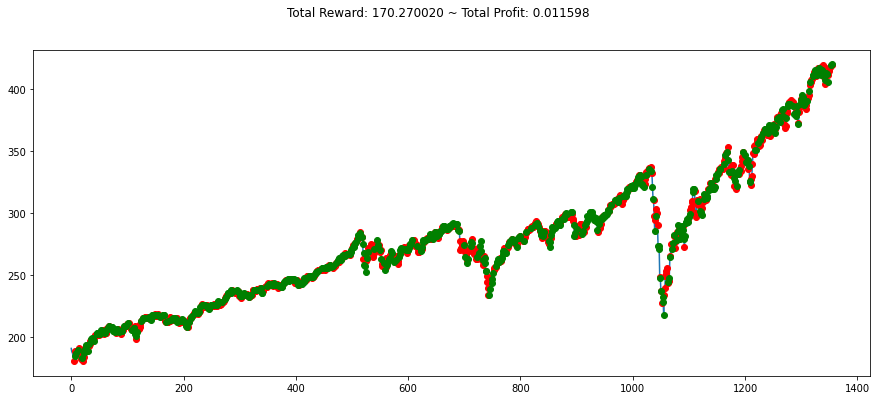

In [19]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [ ]:
model.save('stock_model_89_features.h5')